# Práctico 1

Antes de comenzar importamos las bibliotecas que utilizaremos, además le decimos que todos los gráficos los dibuje sobre el mismo notebook (i.e., que no nos abra una ventana separada) con la línea:

```Python
%matplotlib inline
```

La última línea es para especificar el tamaño de las imágenes (como soy medio chicato, le puse uno bien grande)

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math as m

matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

## Ejercicio 17: Generación de números aleatorios uniformes

En un catálogo de galaxias hay 4 tipos de galaxias, con probabilidades 0.4, 0.3, 0.2, y 0.1 para los tipos "elíptica", "espiral", "enana" e "irregular", respectivamente.
Escriba un programa de Python que genere aleatoriamente tipos de galaxias de tal forma que sigan la distribución dada.

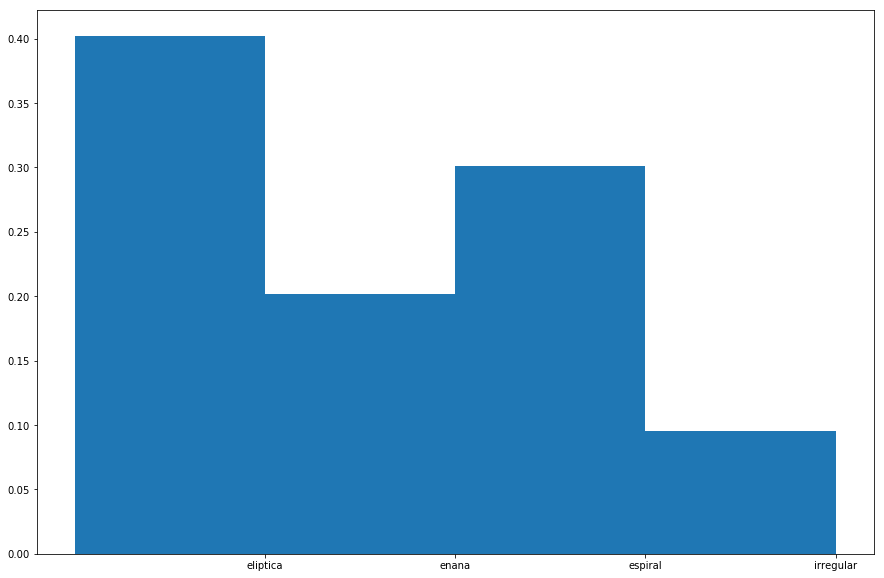

In [5]:
galaxias = ["eliptica","espiral","enana","irregular"]
prob = [0.4,0.3,0.2,0.1]

muestra = np.random.choice(galaxias,size=1000,p=prob)
n = muestra.shape[0]

tipos, cuentas = np.unique(muestra,return_counts=True)

plt.bar(np.arange(4),cuentas/float(n),width=1.0)
plt.xticks(np.arange(4)+0.5,tipos)
plt.show()

## Ejercicio 18: Generadores de números aleatorios


* Escriba un programa para generar números aleatorios en el rango $[0,1)$ usando el método de congruencia lineal.  Intente utilizando la siguiente elección de parámetros (a, c, M, x1 ) = (57, 1, 256, 10).

    Determine el período, esto es, cuántos números son generados antes de que la sequencia se repita.  Tome la secuencia de números generada y busque correlaciones, observando pares de números sucesivos (no los conecte con líneas). ¿Puede esta secuencia usarse para un trabajo serio?.  Testee el método con constantes razonables como las estudiadas. Evalue el momento de orden k (k = 1, 3 y 7) de la distribución de (N = 10, 100 y 1000) números obtenida, y compare con $\frac{1}{k+1}$.


* Compute un número random $\Delta x$ en el rango $\left[ - \sqrt{2}, \sqrt{2} \right)$ y otro $\Delta y$ en el mismo rango. Realize varias (K=10) caminatas aleatorias de $N = 1000$ pasos, comenzando en el origen del plano (cada una con diferentes semillas).

    Calcule el valor de expectación de la distancia al origen $R$ como función del paso $N$ (y de $\sqrt{N}$). Compare con la predicción teórica.


In [6]:
def my_rand(size=1,a=1664525,c=1013904223,M=2**32,x0=10,normed=True):
    x = []
    for i in range(size):
        r = (a*x0 + c)%M
        x0 = r
        if normed:
            r = r/float(M)
        x = np.append(x,r)
    return x

In [7]:
y = my_rand(size=10000,a=57,c=1,M=256,x0=10)

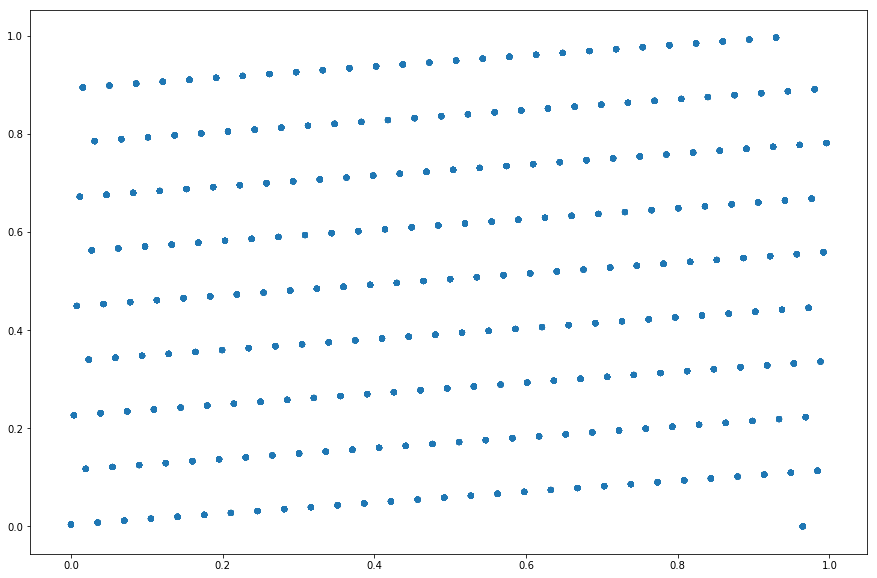

In [8]:
_x = y[:-1]
_y = y[1:]
plt.scatter(_x,_y,edgecolors='None')

In [9]:
y = my_rand(size=10000)

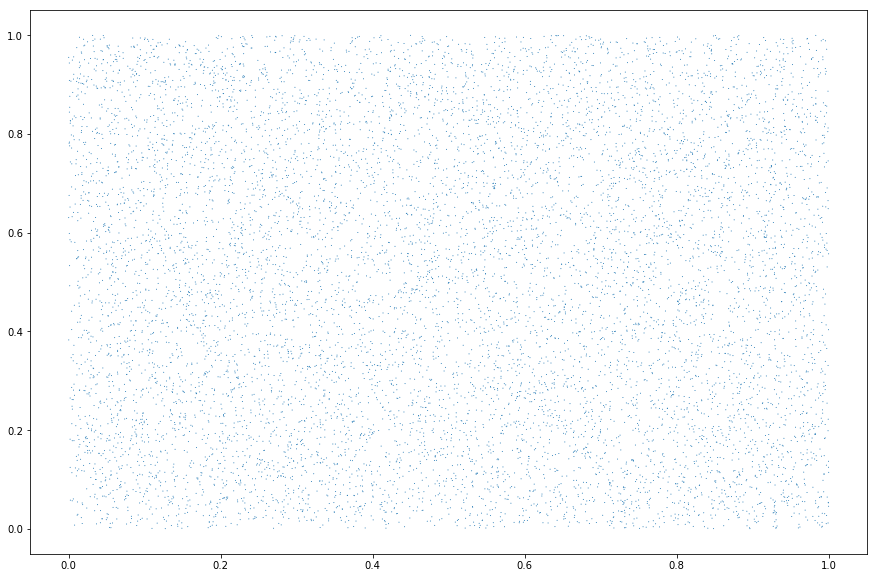

In [10]:
_x = y[:-1]
_y = y[1:]
plt.scatter(_x,_y,edgecolors='None',s=1)

### Buscamos el periodo

In [11]:
size = 10000
y = my_rand(size=size,x0=1024,normed=False)

a = y[0]
for i in range(1,size):
    if y[i] == a:
        break
print i
print y[0],y[i]

9999
2718377823.0 1226283856.0


In [12]:
print "%.3f %.3f %.3f" % (1./2.,1./4.,1./8.)
print "---"
for size in (10,100,1000):
    y = my_rand(size=size)
    mom1 = y.sum()/float(size)
    mom3 = (y**3).sum()/float(size)
    mom7 = (y**7).sum()/float(size)
    print "%.3f %.3f %.3f" % (mom1,mom3,mom7)

0.500 0.250 0.125
---
0.348 0.133 0.035
0.441 0.223 0.127
0.486 0.244 0.125


In [13]:
K = 10
N = 1000

x = np.zeros([K,N],dtype=np.float)
y = np.zeros([K,N],dtype=np.float)
for k in range(K):
    x[k,1:] = my_rand(size=N-1,x0=k)*2.*m.sqrt(2.) - m.sqrt(2.)
    y[k,1:] = my_rand(size=N-1,x0=k+1024)*2.*m.sqrt(2.) - m.sqrt(2.)


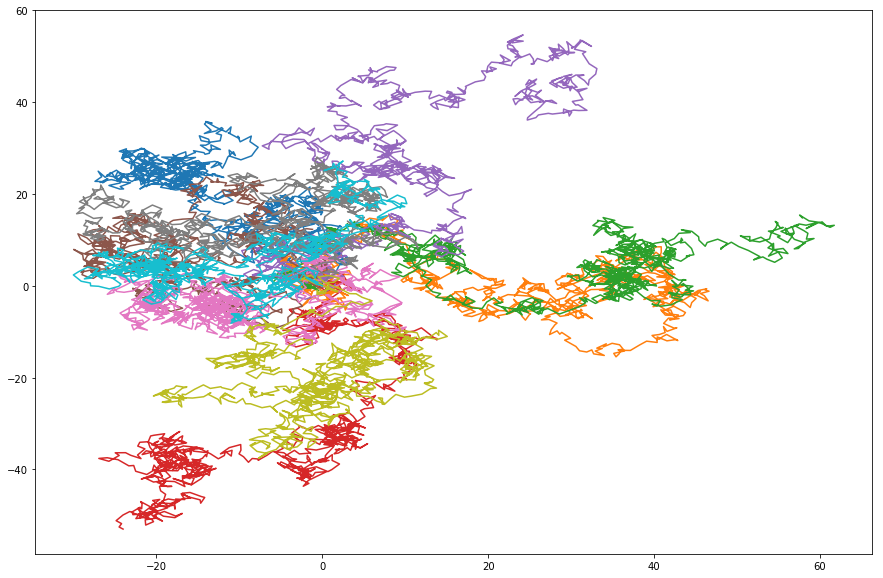

In [14]:
for k in range(K):
    dx = x[k,:].cumsum()
    dy = y[k,:].cumsum()
    plt.plot(dx,dy)

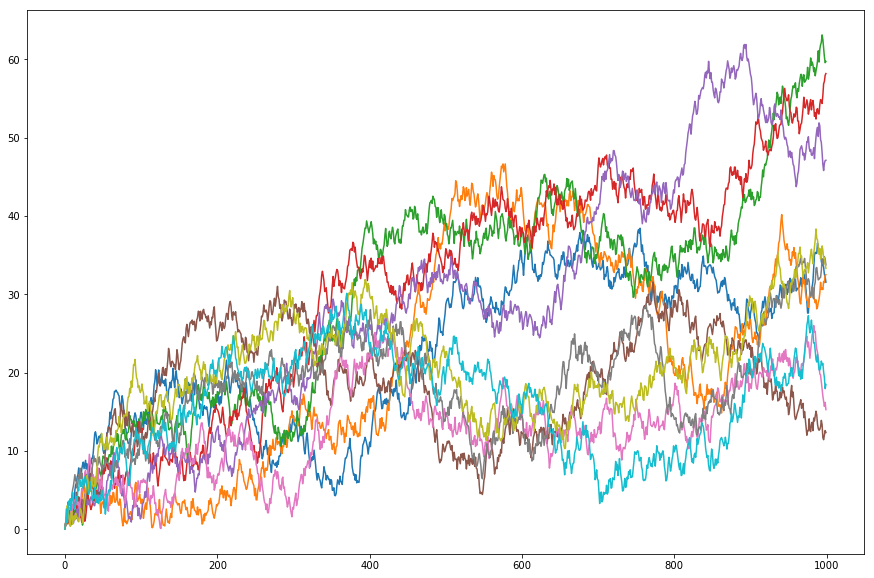

In [15]:
for k in range(K):
    d = np.sqrt((x[k,:].cumsum())**2 + (y[k,:].cumsum())**2)
    plt.plot(d)

In [16]:
e = np.zeros(N,dtype=np.float)
dx = x.cumsum(axis=1)
dy = y.cumsum(axis=1)
d = np.sqrt(dx*dx+dy*dy)
for n in range(N):
    e[n] = d[:,n].sum()/float(K)

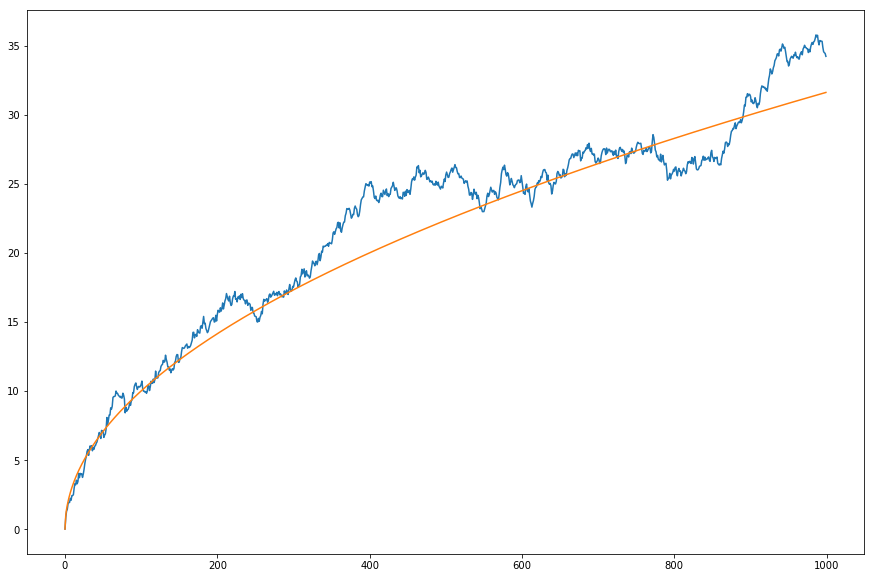

In [17]:
plt.plot(e)
plt.plot(np.sqrt(np.arange(N)))

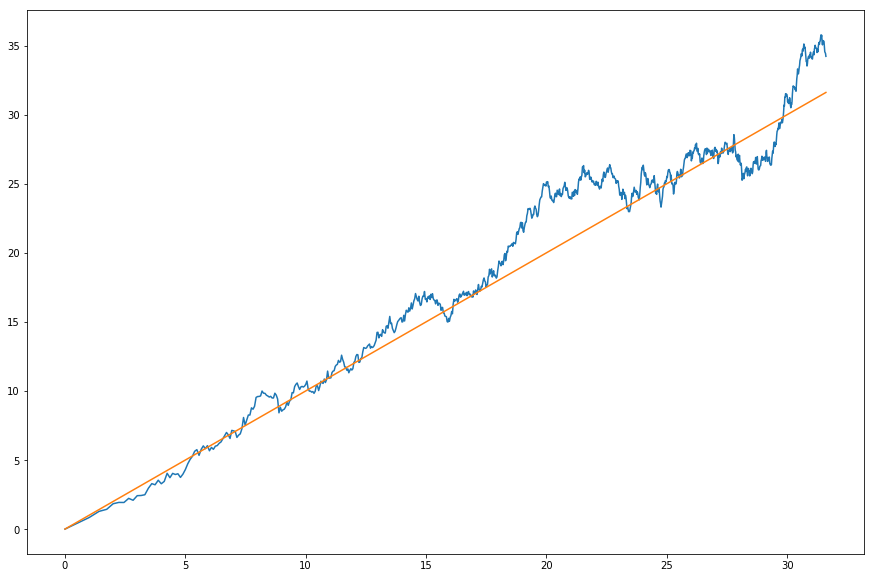

In [18]:
plt.plot(np.sqrt(np.arange(N)),e)
plt.plot(np.sqrt(np.arange(N)),np.sqrt(np.arange(N)))

## Problema 19: jugando con dados

Un experimento aleatorio consiste en arrojar dos dados equilibrados y anotar la suma de los números resultantes en cada uno.

* Identifique claramente cuál es el espacio muestral y la variable aleatoria.

* Asumiendo que los 6 posibles resultados de cada dado son equiprobables, obtenga la distribución de probabilidad de la variable aleatoria.

* Genere un conjunto de valores de la variable aleatoria, utilizando un generador de números aleatorios, a partir de la distribución de probabilidad teórica.  Compare la distribución empírica resultante con la función densidad de probabilidad teórica.

* Realice una simulación del experimento aleatorio, es decir, pares de valores correspondientes a los dos dados, y calcule la variable aleatoria "suma".  Obtenga la distribución de probabilidad empírica de la suma y compare con la distribución teórica.

Variable aleatoria: suma de dos números entre 1 y 6

Espacio muestral: {2,3,4,5,6,7,8,9,10,11,12}

Probabilidades: {1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/26,1/36}

### Experimento 1

(array([ 0.028  ,  0.05677,  0.08324,  0.11177,  0.13934,  0.16509,
         0.13724,  0.11055,  0.08462,  0.05527,  0.02811]),
 array([  1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
         10.5,  11.5,  12.5]),
 <a list of 11 Patch objects>)

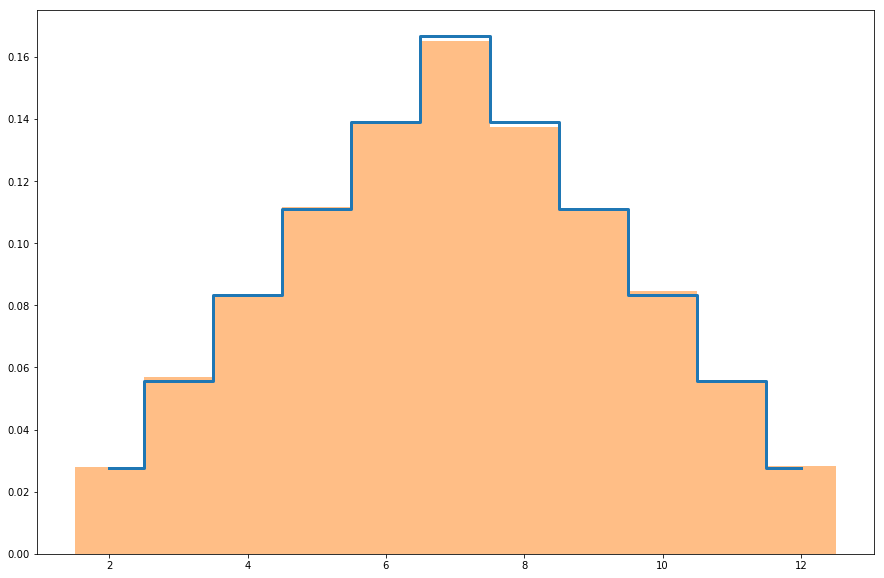

In [22]:
suma = np.array([2,3,4,5,6,7,8,9,10,11,12])
prob = np.array([1,2,3,4,5,6,5,4,3,2,1])/36.

plt.step(suma,prob,where='mid',lw=3)

size = 100000
x = np.random.choice(suma,p=prob,size=size)

bins = np.linspace(1.5,12.5,12)
plt.hist(x,bins=bins,normed=True,align='mid',alpha=0.5)

### Experimento 2

(array([ 0.02745,  0.05702,  0.08245,  0.11044,  0.13903,  0.16607,
         0.13831,  0.11255,  0.08259,  0.0557 ,  0.02839]),
 array([  1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
         10.5,  11.5,  12.5]),
 <a list of 11 Patch objects>)

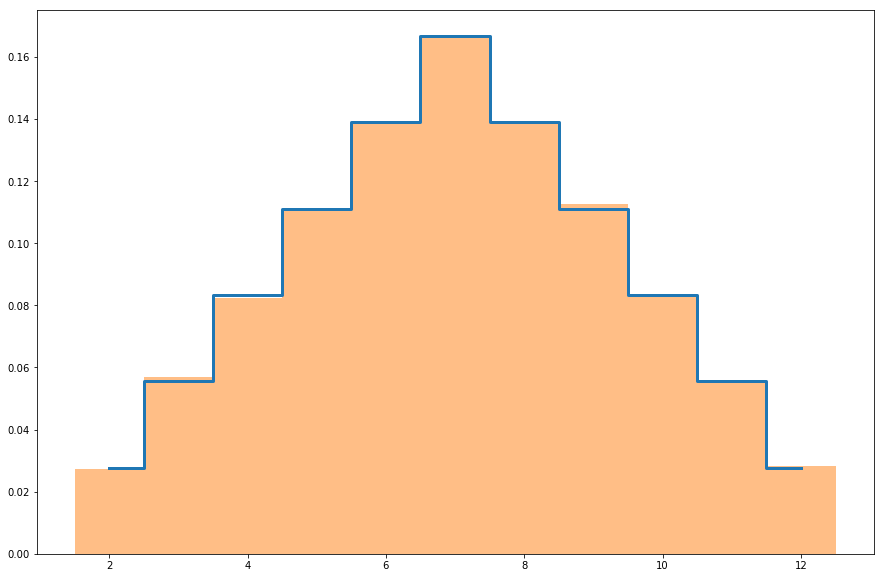

In [23]:
dado = [1,2,3,4,5,6]
x = np.array([])

size = 100000
for i in range(size):
    dado1 = np.random.choice(dado)
    dado2 = np.random.choice(dado)
    x = np.append(x,dado1+dado2)
    
plt.step(suma,prob,where='mid',lw=3)

plt.hist(x,bins=bins,normed=True,align='mid',alpha=0.5)    